In [106]:
import pandas as pd
import os
import matplotlib
#matplotlib.use('AGG')
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme(style="white", rc={
        "axes.edgecolor": "black",
        "ytick.color":"black",
        'axes.spines.left': False,      
        'axes.spines.right': False,
        'axes.spines.top': False})

#ml process
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

#preprocessing
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

#models
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression, RidgeClassifierCV
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

#metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

#save
from joblib import dump, load

In [107]:
import sqlite3
# Read sqlite query results into a pandas DataFrame
conn = sqlite3.connect("mushrooms.sqlite")
df = pd.read_sql_query("SELECT * from data", conn)

In [126]:
class Mushroom_ml():
    
    
    def __init__(self,df, target):
        """--------------------------------------------------------
        Initialize Object with Data

            Parameters
            df, target

            Returns
            None 
        ---------------------------------------------------------"""
        self.df = df
        self.X = df.drop(target, axis = 1)
        self.y = df[target]
        self.target = target
        self.list_models = [
            LogisticRegression(),
            SGDClassifier(),
            LinearSVC(),
            KNeighborsClassifier(n_neighbors=10),
            DecisionTreeClassifier(),
            StackingClassifier([
                    ('model_1', LogisticRegression()),('model_2', LogisticRegression())
                ], final_estimator=LogisticRegression()),
            AdaBoostClassifier(),
            GradientBoostingClassifier(),
            RandomForestClassifier(n_estimators=10)
        ]
#--------------------------------------------------------------------
#--------------------------------------------------------------------

    def df_to_html(self, df, df_name:str, lines:int = 5, columns:int = 5):
        """--------------------------------------------------------
        Transform df to HTML string
            Parameters
            dataframe, sample, nb_lines displayed, nb_column displayed

            Returns
            dict with target name and string of buffer img source
        ---------------------------------------------------------"""

        return df.to_html(max_rows=lines, max_cols=columns) 
    
#--------------------------------------------------------------------
#--------------------------------------------------------------------

    def df_drop_cols(self, df, cols):
        """--------------------------------------------------------
        drop cols in df from list and update df
            Parameters
            dataframe, columns_names to drop

            Returns
            df updated
        ---------------------------------------------------------"""

        df=df.drop(cols, axis=1)

        return df 
    
#--------------------------------------------------------------------
#--------------------------------------------------------------------

    def train_test_split(self, X, y):
        """--------------------------------------------------------
        separate dataset in training and testing sets

            Parameters
            X(features), y(target)

            Returns
            None
        ---------------------------------------------------------"""
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.33, random_state=42)

        return None
#--------------------------------------------------------------------
#--------------------------------------------------------------------

    def test_models(self, list_models='default', transformer=OneHotEncoder()):
        """--------------------------------------------------------
        Test list of models and give mean accuracy after a cross validation
            
            Parameters
            Dataframe X(features), Dataframe:y (target)

            Returns
            String of
        ---------------------------------------------------------"""
        if list_models == 'default':
            list_models=self.list_models
            
        self.train_test_split(self.X, self.y)
            
        final_string=""
        for model in list_models:
            
            final_model = make_pipeline(transformer, model)
            string=f"model : {model} => {cross_val_score(final_model, self.X_train, self.y_train, cv=5).mean()}"
            print(string)
            final_string+= ("\n" + string)
            

        return final_string
    
#--------------------------------------------------------------------
#--------------------------------------------------------------------







In [4]:
mushroom = Mushroom_ml(df, '_class')
new_df = mushroom.df_drop_cols(df, '_id')

In [5]:
mushroom.train_test_split(mushroom.X, mushroom.y)

In [7]:
print(a)


model : LogisticRegression() => 0.9996323529411765
model : SGDClassifier() => 1.0
model : LinearSVC() => 1.0
model : KNeighborsClassifier(n_neighbors=10) => 0.9990812199535462
model : StackingClassifier(estimators=[('model_1', LogisticRegression()),
                               ('model_2', LogisticRegression())],
                   final_estimator=LogisticRegression()) => 0.9996323529411765
model : AdaBoostClassifier() => 1.0
model : GradientBoostingClassifier() => 0.9996323529411765
model : RandomForestClassifier(n_estimators=10) => 1.0


In [8]:
cat = mushroom.X_train.select_dtypes(exclude = [np.number]).columns
transformer = make_column_transformer((OneHotEncoder(handle_unknown='ignore'), cat))
send_model = LogisticRegression()
model = make_pipeline(transformer, send_model) 

NameError: name 'np' is not defined

In [6]:
send_model = LogisticRegression()
model = make_pipeline(OrdinalEncoder(), send_model)

In [7]:
model.fit(mushroom.X_train, mushroom.y_train)

/Users/baguidou/Desktop/mushrooms/mushrooms/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                ('logisticregression', LogisticRegression())])

In [8]:
y_pred = model.predict(mushroom.X_test)

In [9]:
string = [f'accuracy : {accuracy_score(mushroom.y_test, y_pred)}',
f'precision : {precision_score(mushroom.y_test, y_pred, average = None)}',
f'recall : {recall_score(mushroom.y_test, y_pred, average = None)}',
f'f1 : {f1_score(mushroom.y_test, y_pred, average = None)}']

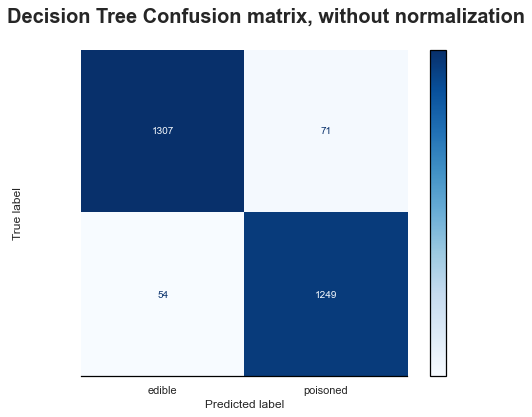

In [10]:
listing = list(mushroom.y_test.unique())
listing.sort()
cm = confusion_matrix(mushroom.y_test, y_pred, labels=listing)
fig, ax = plt.subplots(figsize=(8,6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=listing, )
disp.plot(cmap=plt.cm.Blues, ax=ax)
fig.suptitle('Decision Tree Confusion matrix, without normalization', fontweight='bold', fontsize=20);
plt.show()

In [11]:
listing = list(mushroom.y_test.unique())
listing.sort()
print(classification_report(mushroom.y_test, y_pred, target_names=listing))


              precision    recall  f1-score   support

      edible       0.96      0.95      0.95      1378
    poisoned       0.95      0.96      0.95      1303

    accuracy                           0.95      2681
   macro avg       0.95      0.95      0.95      2681
weighted avg       0.95      0.95      0.95      2681



In [12]:
importances = model.steps[1][1].coef_[0]

In [13]:
model.steps[1][1].coef_

array([[-0.13458394,  1.04638878,  0.09249381,  3.63921302,  0.15528499,
         1.06473897, -9.11232112,  7.67906248, -0.11042294, -0.7530693 ,
        -3.78657208, -0.76681103,  0.1137552 , -0.24139082,  0.37893237,
         0.        ,  2.04887716, -1.96805216, -0.5595488 ,  0.46257037,
        -0.65109293, -0.28939285]])

In [14]:
mushroom.X_train.columns

Index(['_cap_shape', '_cap_surface', '_cap_color', '_bruises', '_odor',
       '_gill_attachment', '_gill_spacing', '_gill_size', '_gill_color',
       '_stalk_shape', '_stalk_root', '_stalk_surface_above_ring',
       '_stalk_surface_below_ring', '_stalk_color_above_ring',
       '_stalk_color_below_ring', '_veil_type', '_veil_color', '_ring_number',
       '_ring_type', '_spore_print_color', '_population', '_habitat'],
      dtype='object')

In [15]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
indices

array([ 7,  3, 16,  5,  1, 19, 14,  4, 12,  2, 15,  8,  0, 13, 21, 18, 20,
        9, 11, 17, 10,  6])

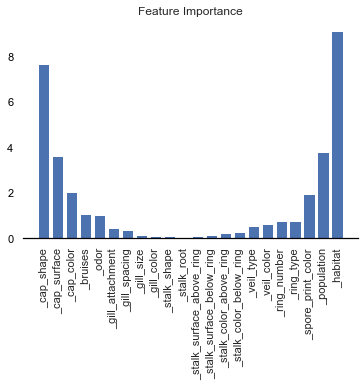

In [51]:

# Rearrange feature names so they match the sorted feature importances
names = mushroom.X_train.columns

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(names, abs(importances[indices]), tick_label=names)
#sns.barplot(x=names, y=importances[indices], orient='v')

# Add feature names as x-axis labels
plt.xticks(names, names, rotation=90)

# Show plot
plt.show()





<AxesSubplot:xlabel='importance', ylabel='feature'>

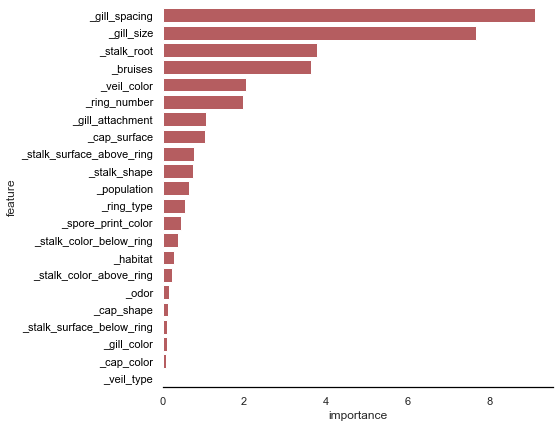

In [56]:
feature_importance = pd.DataFrame(names, columns = ["feature"])
feature_importance["importance"] = abs(importances)
feature_importance.sort_values(by = ["importance"], ascending = False, inplace=True)
f, ax = plt.subplots(figsize=(7, 7))
sns.barplot(x="importance", y="feature", data=feature_importance, color="r", ax=ax)

In [66]:
mushroom.train_test_split(mushroom.X, mushroom.y)
send_model = LogisticRegression()
transformer= OrdinalEncoder()
model = make_pipeline(transformer, send_model)
model.fit(mushroom.X_train, mushroom.y_train)
y_pred = model.predict(mushroom.X_test)
print([f'accuracy : {accuracy_score(mushroom.y_test, y_pred)}',
f'precision : {precision_score(mushroom.y_test, y_pred, average = None)}',
f'recall : {recall_score(mushroom.y_test, y_pred, average = None)}',
f'f1 : {f1_score(mushroom.y_test, y_pred, average = None)}'])

['accuracy : 0.4244684819097352', 'precision : [0.45788668 0.33379501]', 'recall : [0.6509434  0.18495779]', 'f1 : [0.53760863 0.23802469]']


In [133]:
mushroom=Mushroom_ml(
    df[[
        '_habitat',
        '_class', 
        '_gill_color',
        '_cap_color',
        '_cap_shape',
        '_odor'
    ]],
    '_class').test_models()

model : LogisticRegression() => 0.9898949386917302
model : SGDClassifier() => 0.9952231202398314
model : LinearSVC() => 0.9954069437692432
model : KNeighborsClassifier(n_neighbors=10) => 0.9860375141792254
model : DecisionTreeClassifier() => 0.9968765192027224
model : StackingClassifier(estimators=[('model_1', LogisticRegression()),
                               ('model_2', LogisticRegression())],
                   final_estimator=LogisticRegression()) => 0.9913646829255118
model : AdaBoostClassifier() => 0.9961419002862852
model : GradientBoostingClassifier() => 0.9965090409442012
model : RandomForestClassifier(n_estimators=10) => 0.9970605115324366


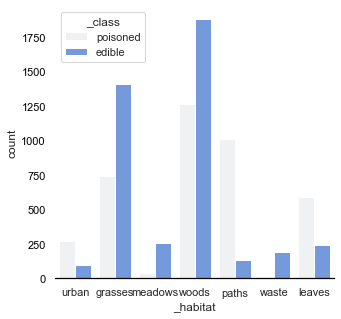

In [213]:
fig, ax = plt.subplots(figsize=(5,5))
plot = sns.countplot(x = df["_habitat"], color = 'cornflowerblue', ax=ax, hue=df["_class"], dodge=True)

In [157]:
df2=df.drop('_id', axis=1)
df2

,_class,_cap_shape,_cap_surface,_cap_color,_bruises,_odor,_gill_attachment,_gill_spacing,_gill_size,_gill_color,...,_stalk_surface_below_ring,_stalk_color_above_ring,_stalk_color_below_ring,_veil_type,_veil_color,_ring_number,_ring_type,_spore_print_color,_population,_habitat
0,poisoned,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisoned,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,edible,knobbed,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8120,edible,convex,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,brown,one,pendant,buff,several,leaves
8121,edible,flat,smooth,brown,no,none,attached,close,broad,brown,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8122,poisoned,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,...,silky,white,white,partial,white,one,evanescent,white,several,leaves


In [158]:
df2.drop_duplicates()

,_class,_cap_shape,_cap_surface,_cap_color,_bruises,_odor,_gill_attachment,_gill_spacing,_gill_size,_gill_color,...,_stalk_surface_below_ring,_stalk_color_above_ring,_stalk_color_below_ring,_veil_type,_veil_color,_ring_number,_ring_type,_spore_print_color,_population,_habitat
0,poisoned,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisoned,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,edible,knobbed,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8120,edible,convex,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,brown,one,pendant,buff,several,leaves
8121,edible,flat,smooth,brown,no,none,attached,close,broad,brown,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8122,poisoned,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,...,silky,white,white,partial,white,one,evanescent,white,several,leaves


In [177]:
df2.nunique()


_class                        2
_cap_shape                    6
_cap_surface                  4
_cap_color                   10
_bruises                      2
_odor                         9
_gill_attachment              2
_gill_spacing                 2
_gill_size                    2
_gill_color                  12
_stalk_shape                  2
_stalk_root                   5
_stalk_surface_above_ring     4
_stalk_surface_below_ring     4
_stalk_color_above_ring       9
_stalk_color_below_ring       9
_veil_type                    1
_veil_color                   4
_ring_number                  3
_ring_type                    5
_spore_print_color            9
_population                   6
_habitat                      7
dtype: int64

In [181]:
df2.duplicated().sum()


0

In [220]:
df2=df.drop('_id', axis=1)
display_list = list(df2.columns)

In [214]:
mushroom.X.columns

AttributeError: 'str' object has no attribute 'X'

In [221]:

for supp_cols in [
    "_gill_attachment",
    "_gill_spacing",
    "_veil_color",
    "_veil_type",
    "_ring_number"
    ]:
    display_list.remove(supp_cols)

In [222]:
display_list

['_class',
 '_cap_shape',
 '_cap_surface',
 '_cap_color',
 '_bruises',
 '_odor',
 '_gill_size',
 '_gill_color',
 '_stalk_shape',
 '_stalk_root',
 '_stalk_surface_above_ring',
 '_stalk_surface_below_ring',
 '_stalk_color_above_ring',
 '_stalk_color_below_ring',
 '_ring_type',
 '_spore_print_color',
 '_population',
 '_habitat']